In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# load the breast_cancer dataset
init_data = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)
X_frame = pd.DataFrame(data=X, columns=init_data['feature_names'])
y_frame = pd.DataFrame(data=y, columns=['label'])


In [3]:
# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a RandomForestClassifier as model 
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('-- Accuracy with all features --')
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/X.shape[1]))

-- Accuracy with all features --
Accuracy: 0.98
Accuracy per feature: 0.03


 1) worst concave points           0.141849
 2) mean concave points            0.117697
 3) worst radius                   0.110919
 4) worst perimeter                0.105243
 5) mean concavity                 0.077163
 6) worst area                     0.073364
 7) area error                     0.041760
 8) mean perimeter                 0.036943
 9) mean radius                    0.035625
10) worst concavity                0.035205
11) mean area                      0.032890
12) worst texture                  0.022736
13) mean texture                   0.018584
14) worst compactness              0.016786
15) radius error                   0.015408
16) worst symmetry                 0.014770
17) worst smoothness               0.014235
18) mean compactness               0.010085
19) perimeter error                0.010040
20) worst fractal dimension        0.009015
21) concave points error           0.008085
22) compactness error              0.007420
23) mean smoothness             

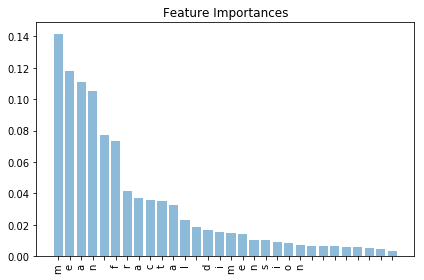

In [4]:
# inline plotting instead of popping out
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            list(X_frame)[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           list(X_frame)[indices[f]], rotation=90)
plt.tight_layout()
plt.show()

In [8]:
fnum = 3

X_train_less = np.empty(shape=(len(X_train),fnum))
X_test_less = np.empty(shape=(len(X_test),fnum))
for f in range(fnum):
    X_train_less[:,f] = X_train[:,indices[f]]
    X_test_less[:,f] = X_test[:,indices[f]]

forest.fit(X_train_less, y_train)

y_pred = forest.predict(X_test_less)
print('-- Accuracy with 3 features --')
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/ fnum))

-- Accuracy with 3 features --
Accuracy: 0.96
Accuracy per feature: 0.32


In [9]:
fnum = 2

X_train_less = np.empty(shape=(len(X_train),fnum))
X_test_less = np.empty(shape=(len(X_test),fnum))
for f in range(fnum):
    X_train_less[:,f] = X_train[:,indices[f]]
    X_test_less[:,f] = X_test[:,indices[f]]

forest.fit(X_train_less, y_train)

y_pred = forest.predict(X_test_less)
print('-- Accuracy with 2 features --')
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/ fnum))

-- Accuracy with 2 features --
Accuracy: 0.89
Accuracy per feature: 0.44
